In [69]:
import sympy as sp
#from sympy.abc import k,s,t,x,y,alpha,beta,w
sp.init_printing()

# Define the symbols of the problem

- $w_{ij}$ is the weighted adjacency matrix
- $a_{ij}$ is the binary adjacency matrix
- $t$ is the threshold, such that $\Theta(w_{ij}-t)=0$
- $\alpha_i$ and $\beta_i$ are the Lagrange multipliers of the problem
- $x_i,y_i$ are defined as $x_i=e^{-\alpha_i}$ and $y_i=e^{-\beta_i}$

In [70]:
aij=sp.Symbol('a_{ij}', positive=True,real=True)
wij=sp.Symbol('w_{ij}', positive=True,real=True)
t = sp.Symbol('t', positive=True,real=True)
alphai = sp.Symbol('\\alpha_i',positive=True,real=True)
alphaj = sp.Symbol('\\alpha_j',positive=True,real=True)
betai = sp.Symbol('\\beta_i',positive=True,real=True)
betaj = sp.Symbol('\\beta_j',positive=True,real=True)
alphaij = sp.Symbol('\\alpha_{ij}',positive=True,real=True)
betaij = sp.Symbol('\\beta_{ij}',positive=True,real=True)
xi = sp.Symbol('x_i',positive=True,real=True)
xj = sp.Symbol('x_j',positive=True,real=True)
yi = sp.Symbol('y_i',positive=True,real=True)
yj = sp.Symbol('y_j',positive=True,real=True)

We then define the graph Hamiltonian as $H=\sum_{i<j} \alpha_{ij} t \Theta(w_{ij}-t) + \beta_{ij} w_{ij} \Theta(w_{ij}-t)$.
Finally we get the partition function $Z = \sum_{G} e^{-H(G)}$

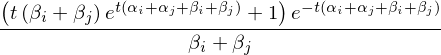

In [82]:
H = (alphai+alphaj)*t*sp.Heaviside(wij-t) + (betai+betaj)*wij*sp.Heaviside(wij-t)
#H = (betai+betaj)*wij*sp.Heaviside(wij-t)
Z = sp.simplify(sp.integrate(sp.exp(-H.rewrite(sp.Piecewise)), (wij,0,sp.oo)))
Z

The graph probability is obtained as $P(G) = e^{-H(G)}/Z$

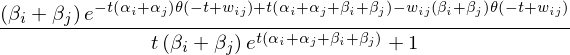

In [83]:
P=sp.simplify(sp.exp(-H)/Z)
sp.simplify(sp.expand_log(P))

Now we try to redo the same with the replacement of variables $x_i=e^{-\alpha_i}$, $y_i=e^{-\beta_i}$.

In [77]:
H = H.replace(betai,-sp.log(yi)).replace(betaj,-sp.log(yj)).replace(alphai,-sp.log(xi)).replace(alphaj,-sp.log(xj))
Z = Z.replace(betai,-sp.log(yi)).replace(betaj,-sp.log(yj)).replace(alphai,-sp.log(xi)).replace(alphaj,-sp.log(xj))
P = sp.simplify(sp.exp(-H)/Z)
sp.expand_log(P) # graph probability

This tells us that the weights are sampled from a left truncated exponential distribution

Taking the log we have an expression for the loglikelihood $\mathcal{L}(G)$

In [79]:
sp.expand_log(sp.log(P)) # loglikelihood

Now we get an expression for the expected link probability, by taking the derivative of the free energy $F=-\log(Z)$ with respect to the original Lagrange multipliers $\alpha_i$ and $\beta_i$

In [64]:
F = -sp.log(sp.expand_log(Z))
dalphai = -sp.log(xi)
dbetai = -sp.log(yi)

This is the expected link probability $\langle a_{ij} \rangle = \frac{\partial F}{\partial \alpha_i}$

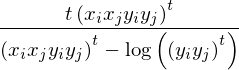

In [65]:
expected_adjacency = sp.simplify(sp.diff(F,xi)*sp.diff(sp.exp(-alphai),alphai)).replace(sp.exp(-alphai),xi)
expected_adjacency

While the following is the expected weight $\langle w_{ij} \rangle = \frac{\partial F}{\partial \beta_i}$

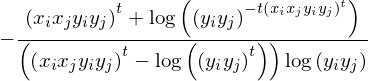

In [49]:
expected_weight = sp.simplify((sp.simplify(sp.diff(F,yi)*sp.diff(sp.exp(-betai),betai)).replace(sp.exp(-betai),yi)))
expected_weight

pretty complicated expression, however if we divide it by the link probability we see it is directly proportional to it:


In [66]:
sp.simplify((expected_adjacency * ((t*sp.log(yi*yj)-1)/(t*sp.log(yi*yj))))/expected_weight)


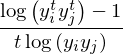

In [68]:
sp.simplify(expected_weight/expected_adjacency)